#  Natural Language Processing (NLP)

> **IMPORTANT NOTES**
>
> Before you run the code below, please make sure that you already change the runtime to GPU.

# A. Understanding CountVectorizer

In [ ]:
# Let's Define Simple Corpus

corpus = [
    'Saya sedang belajar data science',
    'Data yang saya proses adalah data teks',
    'NLP adalah cabang besar didalam data science'
]

`CountVectorizer()` is a module in Scikit Learn that use Bag of Words. Two methods that usually used are :
* `.fit()` : used to collect vocabularies.
* `.transform()` : used to convert token into numeric value.

*See this [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for more details.*

In [ ]:
# Collect the Vocabularies using CountVectorizer()

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(corpus)

CountVectorizer()

In [ ]:
# See Vocabularies

count_vect.get_feature_names_out()

array(['adalah', 'belajar', 'besar', 'cabang', 'data', 'didalam', 'nlp',
       'proses', 'saya', 'science', 'sedang', 'teks', 'yang'],
      dtype=object)

In [ ]:
# Transform from Corpus into Numerical Vector

corpus_count_vect = count_vect.transform(corpus)
corpus_count_vect

<3x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

Notes :

* As you can see, variable `corpus_vect` is stored as **sparse matrix**.
* The sparse matrix is a matrix that contains non-zero values.
* From the above output, we see that there are **`3 x 13` equal to 39 values but only 18 of them are not zeroes (only 46.15 %) with 13 vocabularies**.
* This is just from simple corpus that contains 3 documents.
* Imagine if you have a corpus with large documents. Consequently, you will  have massive non-zero values.

In [ ]:
# Let's See Contents of Sparse Matrix

print(corpus_count_vect)

  (0, 1)	1
  (0, 4)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 4)	2
  (1, 7)	1
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 9)	1


As previously mentioned, a sparse matrix is a matrix that only save non-zero values. On the other hand, a dense matrix is a matrix that contains all values (both zero values and non-zero values). See the comparison below as illustration.

<img src='https://static.javatpoint.com/ds/images/types-of-sparse-matrices.png'>

In [ ]:
# See `corpus_vect` as Dense Matrix

corpus_count_vect.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]])

In [ ]:
# Display corpus

corpus

['Saya sedang belajar data science',
 'Data yang saya proses adalah data teks',
 'NLP adalah cabang besar didalam data science']

In [ ]:
# See `corpus_vect` with Their Token's Name

import pandas as pd
pd.DataFrame(corpus_count_vect.toarray(), columns = count_vect.get_feature_names_out())

,adalah,belajar,besar,cabang,data,didalam,nlp,proses,saya,science,sedang,teks,yang
0,0,1,0,0,1,0,0,0,1,1,1,0,0
1,1,0,0,0,2,0,0,1,1,0,0,1,1
2,1,0,1,1,1,1,1,0,0,1,0,0,0


# Case Study : Twitter Sentiment Analysis

## B.1 - Import Libraries & Data Loading

In [ ]:
# Import Libraries

import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
import tensorflow_hub as tf_hub

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
# !pip install pysastrawi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-2/master/w1/P2W1D3PM%20-%20Natural%20Language%20Processing%20(NLP)%20-%20Twitter%20Sentiment%20Analysis.csv',header=None).rename({0:'sentimen',1:'text'},axis=1)
data

,sentimen,text
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...
...,...,...
3704,|positive|,|yay|
3705,|positive|,|yeah|
3706,|positive|,|yihaa|
3707,|negative|,|dungu|


In [ ]:
data['sentimen'].value_counts()

sentimen
|negative|    2570
|positive|     982
|neutral|      156
|netral|         1
Name: count, dtype: int64

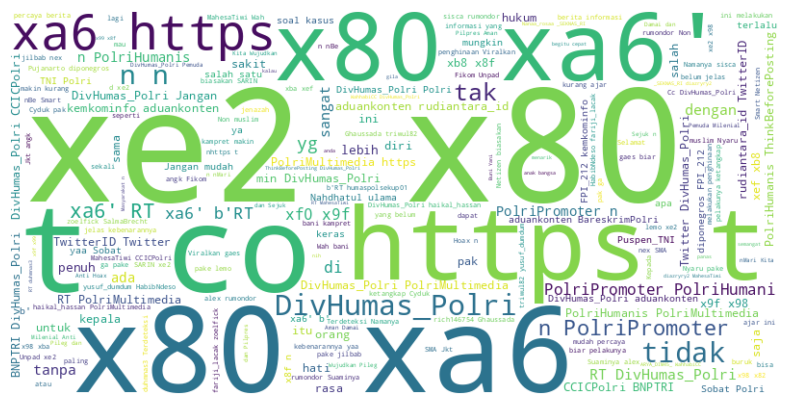

In [ ]:
combine_text= ' '.join(data['text'])
wordcloud_text= WordCloud(width=800, height=400, background_color='white').generate(combine_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data.query("text.str.contains('https')")['text'].head(2).values

array(['|@DivHumas_Polri: Polri : Reuni 212 Berjalan Kondusif\\n\\n#PolriPromoter #PolriHumanis @PolriMultimedia https://t.co/dxWUJk96g5|',
       '|Ayo pak @BareskrimPolri @CCICPolri @DivHumas_Polri @KejaksaanRI segera ditindak, jangan sampe nanti di katakan B***I https://t.co/pX7ZMiHZWC|'],
      dtype=object)

## B.2 - Text Preprocessing

In [ ]:
# Define Stopwords
from nltk.corpus import stopwords
stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id.append('oh') # Cara lain dari "stpwds_id = stpwds_id + ['oh']"

# Define Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

In [ ]:
len(stpwds_id)

758

In [ ]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [ ]:
text='|@DivHumas_Polri: Polri : Reuni 212 Berjalan Kondusif\\n\\n#PolriPromoter #PolriHumanis @PolriMultimedia https://t.co/dxWUJk96g5|'
re.sub("#[A-Za-z0-9_]+", " ", text)

'|@DivHumas_Polri: Polri : Reuni 212 Berjalan Kondusif\\n\\n    @PolriMultimedia https://t.co/dxWUJk96g5|'

In [ ]:
tokens = word_tokenize(text)
tokens = [word for word in tokens if word not in stpwds_id]
tokens = [stemmer.stem(word) for word in tokens]
print(tokens)

['', '', 'divhumas polri', '', 'polri', '', 'reuni', '212', 'jalan', 'kondusif n n', '', 'polripromoter', '', 'polrihumanis', '', 'polrimultimedia', 'https', '', 't co dxwujk96g5']


In [ ]:
# Applying Text Preprocessing to the Dataset

data['text_processed'] = data['text'].apply(lambda x: text_preprocessing(x))
data

,sentimen,text,text_processed
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif
...,...,...,...
3704,|positive|,|yay|,yay
3705,|positive|,|yeah|,yeah
3706,|positive|,|yihaa|,yihaa
3707,|negative|,|dungu|,dungu


In [ ]:
data['text_processed'].head(2).values

array(['hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei',
       'dengar kontes selamat teman'], dtype=object)

In [ ]:
data.query("text_processed.str.contains('sayang')")['text'].head(2).values

array(['|@PrincessSuperC Hai Cici tersayang! Cuma mau memberitaukan kalau saya cinta kamu! OH! Dan akan berkunjung secepatnya? Fantasi berkendari 5 Mei!!!!|',
       '|kasih sayang|'], dtype=object)

## B.3 - Target Conversion

In [ ]:
# Display Target

data.sentimen.unique()

array(['|positive|', '|neutral|', '|negative|', '|netral|'], dtype=object)

In [ ]:
# Change Target into Number

data['label'] = data['sentimen'].replace({'|negative|' : 0, '|neutral|' : 1, '|netral|' : 1, '|positive|' : 2})
data

,sentimen,text,text_processed,label
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...,2
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman,2
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik,2
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...,2
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif,2
...,...,...,...,...
3704,|positive|,|yay|,yay,2
3705,|positive|,|yeah|,yeah,2
3706,|positive|,|yihaa|,yihaa,2
3707,|negative|,|dungu|,dungu,0


In [ ]:
# Target Distribution

data['label'].value_counts()

0    2570
2     982
1     157
Name: label, dtype: int64

In [ ]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data.text_processed,
                                                    data.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=data.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2836,)
Val Size   :  (316,)
Test Size  :  (557,)


In [ ]:
# Change Target to One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## B.4 - Model Building

### B.4.1 - Text Vectorization

In [ ]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<2836x2352 sparse matrix of type '<class 'numpy.int64'>'
	with 5730 stored elements in Compressed Sparse Row format>

In [ ]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  2352
Maximum Sentence Length :  34 tokens


In [ ]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
                                       max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [ ]:
# Example Result

## Document example
print('Document example')
print(data.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Vector size : ', text_vectorization([data.text_processed[0]]).shape)

Document example
hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei

Result of Text Vectorization
tf.Tensor(
[[  1   1  81   1 344   1  54   1   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 34), dtype=int64)
Vector size :  (1, 34)


In [ ]:
len(text_vectorization.get_vocabulary())

2352

In [ ]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'x',
 'xe',
 'xa',
 'rt',
 'b',
 'yg',
 'f',
 'polri',
 'salah',
 'hina',
 'orang',
 'xf',
 'hukum',
 'hoax',
 'd',
 'polisi',
 'penuh',
 'sakit']

### B.4.2 - Word Embedding

In [ ]:
# Embedding

from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [ ]:
# Example Result

## Document example
print('Document example')
print(data.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Vector size : ', text_vectorization([data.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([data.text_processed[0]])).shape)

Document example
hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei

Result of  Text Vectorization
tf.Tensor(
[[  1   1  81   1 344   1  54   1   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 34), dtype=int64)
Vector size :  (1, 34)

Result of  Embedding
tf.Tensor(
[[[-0.00064616  0.02688582 -0.00640865 ... -0.04578236  0.04060515
    0.00864556]
  [-0.00064616  0.02688582 -0.00640865 ... -0.04578236  0.04060515
    0.00864556]
  [ 0.01766454  0.01272137 -0.00611862 ... -0.00110748 -0.0152946
   -0.00130162]
  ...
  [-0.00680874 -0.01753153 -0.01875595 ... -0.00450758  0.03782784
    0.0317919 ]
  [-0.00680874 -0.01753153 -0.01875595 ... -0.00450758  0.03782784
    0.0317919 ]
  [-0.00680874 -0.01753153 -0.01875595 ... -0.00450758  0.03782784
    0.0317919 ]]], shape=(1, 34, 128), dtype=float32)
Vector size :  (1, 34, 128)


### B.4.3 - LSTM

In [ ]:
# Model Training using LSTM
%%time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1= Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences= True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(3, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

#bisa coba gunakan callbacks dengan EarlyStopping

model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
89/89 [==============================] - 19s 102ms/step - loss: 0.7464 - accuracy: 0.6865 - val_loss: 0.6615 - val_accuracy: 0.6930
Epoch 2/50
89/89 [==============================] - 2s 27ms/step - loss: 0.5890 - accuracy: 0.7377 - val_loss: 0.6605 - val_accuracy: 0.7468
Epoch 3/50
89/89 [==============================] - 2s 26ms/step - loss: 0.3398 - accuracy: 0.8783 - val_loss: 0.6952 - val_accuracy: 0.7595
Epoch 4/50
89/89 [==============================] - 1s 16ms/step - loss: 0.2576 - accuracy: 0.9041 - val_loss: 0.6275 - val_accuracy: 0.7595
Epoch 5/50
89/89 [==============================] - 2s 21ms/step - loss: 0.2195 - accuracy: 0.9097 - val_loss: 0.7194 - val_accuracy: 0.7500
Epoch 6/50
89/89 [==============================] - 1s 14ms/step - loss: 0.1950 - accuracy: 0.9154 - val_loss: 0.7821 - val_accuracy: 0.7373
Epoch 7/50
89/89 [==============================] - 1s 14ms/step - loss: 0.1940 - accuracy: 0.9062 - val_loss: 0.8245 - val_accuracy: 0.7595
Epoch 8/50


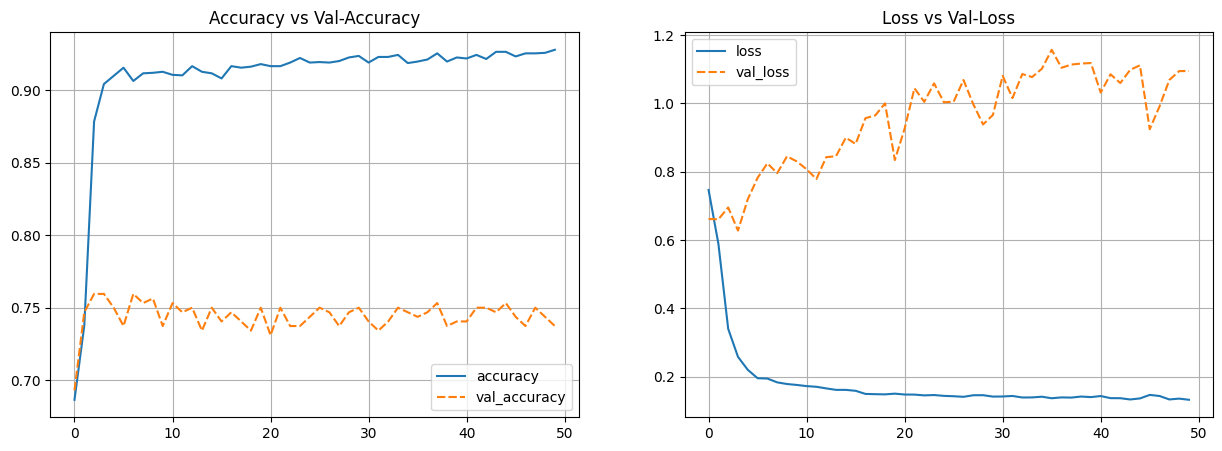

In [ ]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [ ]:
model_lstm_1.evaluate(X_test, y_test_ohe)

18/18 [==============================] - 0s 11ms/step - loss: 1.2340 - accuracy: 0.7397


[1.2340080738067627, 0.739676833152771]

It can be seen that our model is overfit. Train accuracy is really high, more than 90 %, meanwhile validation accuracy is around 60 %.

### C.4.4 - LSTM with Transfer Learning

Let's improve our model using transfer learning. We will use embedding layer that was trained on Google news 3B corpus.

For more details please visit :
* [Embedding layer source](https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1)
* [List of Embedding Layers in Indonesian language](https://tfhub.dev/s?module-type=text-embedding&q=indonesian)

In [ ]:
# Download the Embedding Layer

url = 'https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [ ]:
# Model Training using LSTM with Transfer Learning
%%time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(3, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
89/89 [==============================] - 11s 37ms/step - loss: 0.8064 - accuracy: 0.6904 - val_loss: 0.7459 - val_accuracy: 0.6930
Epoch 2/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7458 - accuracy: 0.6929 - val_loss: 0.7361 - val_accuracy: 0.6930
Epoch 3/50
89/89 [==============================] - 2s 27ms/step - loss: 0.7432 - accuracy: 0.6929 - val_loss: 0.7353 - val_accuracy: 0.6930
Epoch 4/50
89/89 [==============================] - 2s 23ms/step - loss: 0.7420 - accuracy: 0.6929 - val_loss: 0.7335 - val_accuracy: 0.6930
Epoch 5/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7394 - accuracy: 0.6929 - val_loss: 0.7298 - val_accuracy: 0.6930
Epoch 6/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7392 - accuracy: 0.6929 - val_loss: 0.7614 - val_accuracy: 0.6930
Epoch 7/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7424 - accuracy: 0.6929 - val_loss: 0.7273 - val_accuracy: 0.6930
Epoch 8/50
8

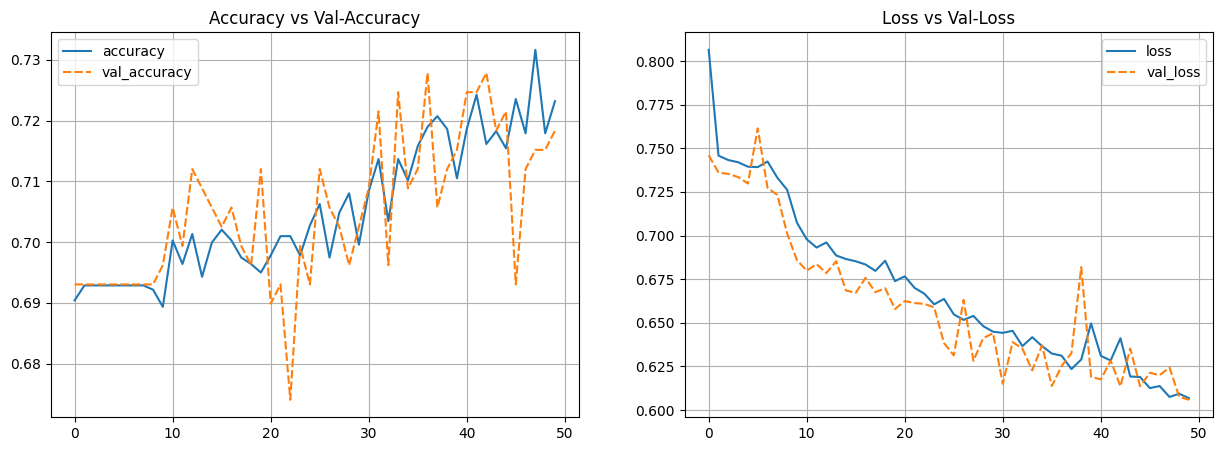

In [ ]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

After we added transfer learning into our model, the model is less overfit and tends to be good-fit. But, it so hard to increase the accuracy. Here are some possibilities that cause it :

1. Incomplete text preprocessing.
   Dataset from social media often in informal text. Therefore, we must handle it first such as :
   * Implement Word Formalization : `u` become `you`, `gw` become `saya`.
   * Remove repeated characters in a word : `pagiii` become `pagi`, `aduuuhhh` become `aduh`.
   * Handle repeated words : `tinggi2` become `tinggi-tinggi`, `sebenar2nya` become `sebenar-benarnya`.
   * Remove single char.
   * etc.

2. Imbalanced dataset
   
   Our dataset contains of target with distribution :
   * `0` : 2570
   * `1` : 157
   * `2` : 982